# Introduction

Predict global video game sales with a dataset from [Kaggle](https://www.kaggle.com/gregorut/videogamesales).

Personal goal is to use Python for cleaning and classical machine learning.

*Note: Codes may also come from other kernels for practice/workflow

## Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Note: This could be another project where I could modify the scraper for practice.

Fields include:

1. Rank - Ranking of overall sales

1. Name - The games name

1. Platform - Platform of the games release

1. Year - Year of the game's release

1. Genre - Genre of the game

1. Publisher - Publisher of the game

1. NA_Sales - Sales in North America (in millions)

1. EU_Sales - Sales in Europe (in millions)

1. JP_Sales - Sales in Japan (in millions)

1. Other_Sales - Sales in the rest of the world (in millions)

1. Global_Sales - Total worldwide sales.


## Framing the problem

Can you predict global video game sales?

## Method of Evaluation

Since we are predicting a price, this will be a regression problem. We will use linear algorithms like linear regression, ridge regression, lasso regression, elastic-net regression and non-linear algorithms like random forest, gradient boosting, and a stacking method.

The evaluation metric we will be using is __Root-Mean-Squared_error (RMSE)__ between actual sales and the predicted sales. RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation.

__Why RMSE over mean-squared-error (MAE)?__ Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. RMSE has the benefit of penalizing large errors more so can be more appropriate in some cases, for example, if being off by 10 is more than twice as bad as being off by 5. But if being off by 10 is just twice as bad as being off by 5, then MAE is more appropriate.

Here's a picture of the RMSE formula below.

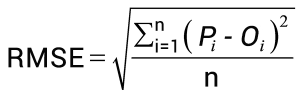

In [2]:
from IPython.display import Image
url = 'https://gisgeography.com/wp-content/uploads/2014/07/rmse-formula1-300x96.png'
Image(url, width=300, height=350)

## Modeling Framework

1. Framing the problem
    - What are we trying to solve?
    - Understand what's the problem here and ask questions
    - What type of problem are we trying to solve?
        - Classification, regression, etc.
        - Types of algorithms specified for possible use
2. Collecting relevant information and data
    - What type of data do we have?
        - Databases, scraped data, API data, etc.
    - What other data requirements are there?
    - What is considered a success for this problem?
        - How do we know our models are good?
3. Process for analysis (preprocessing & cleaning)
    - How does the data structure and distribution look like?
    - Is the data usable right away? 
    - Can the data be plotted?
    - What changes do we need to make the data usable if it's not already?
4. Exploratory data analysis
    - How does the data look like?
    - Are there any patterns?
        - Identify any summary statistics, plotting, counting, etc.
    - Familiarize yourself with the data
    - Basically the step to help you get to know the data better
5. Feature engineering (applied machine learning)
    - Can we create more data (features) that will be helpful for our models?
    - "... re-working of predictors is more of an art, requiring the right tools and experience to find better predictor representations" - Max Kuhn
6. Statistical analysis
    - Univariate, bivariate, multivariate analysis
        - Analysis of a single feature
        - Analysis of two features and their relationships
        - Analysis of data collected on more than one dependent variable and their relationships (PCA, PLS)
7. Modeling & Scoring
    - Splitting the data into train and test sets
    - Standardizing the data to be on similar scales
    - Create baseline & pre-tuned models
    - Cross-validate the models
    - Hyperparameter tuning
    - Create cross-validated tuned models using best hyperparameters
    - Compare models
8. Evaluation
    - How accurate are the models?
    - What evaluation metric are we using?
    - Is the final model good enough?
    - Which features are important?
    - Iterate steps with feature selection
9. Extra
    - Create train vs. cross-validating learning curves per size
10. Ending Notes
    - Notes on algorithms used, models created, ways to improve performances